## Importing necessary Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import pickle

import warnings
warnings.filterwarnings('ignore')

## Part 1 - Data Preprocessing

##### Importing the dataset

In [3]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##### Drop irrelevant columns

In [4]:
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Encoding Categorical variables

Label encoding the **Gender** Column

In [5]:
label_encoder_gender = LabelEncoder()

data['Gender'] = label_encoder_gender.fit_transform(data['Gender'])
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


##### One hot encoding **Geography** column

In [8]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder_geo = OneHotEncoder()
geo_encoder = onehot_encoder_geo.fit_transform(data[['Geography']]).toarray()
geo_encoder

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [9]:
onehot_encoder_geo.get_feature_names_out(['Geography'])

array(['Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype=object)

In [10]:
geo_encoded_df = pd.DataFrame(geo_encoder, columns = onehot_encoder_geo.get_feature_names_out(['Geography']))

geo_encoded_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


##### Combine one hot encoder columns with the original data

In [11]:
data = pd.concat([data.drop('Geography', axis=1), geo_encoded_df], axis=1)
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


##### Handling duplicate records

In [14]:
data.duplicated().sum()

0

##### Save the encoders and scaler

In [15]:
with open('label_encoder_gender.pkl', 'wb') as file:
    pickle.dump(label_encoder_gender, file)

with open('onehot_encoder_geo.pkl', 'wb') as file:
    pickle.dump(onehot_encoder_geo,file)

In [16]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


#### Divide the dataset into independent and dependent features

In [17]:
X = data.drop('Exited', axis=1)
y= data['Exited']

In [18]:
X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,0.0,1.0,0.0


In [19]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

## Splitting the dataset into training and test set

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [21]:
X_train

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
9254,686,1,32,6,0.00,2,1,1,179093.26,1.0,0.0,0.0
1561,632,1,42,4,119624.60,2,1,1,195978.86,0.0,1.0,0.0
1670,559,1,24,3,114739.92,1,1,0,85891.02,0.0,0.0,1.0
6087,561,0,27,9,135637.00,1,1,0,153080.40,1.0,0.0,0.0
6669,517,1,56,9,142147.32,1,0,0,39488.04,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,768,1,54,8,69712.74,1,1,1,69381.05,1.0,0.0,0.0
5191,682,0,58,1,0.00,1,1,1,706.50,1.0,0.0,0.0
5390,735,0,38,1,0.00,3,0,0,92220.12,1.0,0.0,0.0
860,667,1,43,8,190227.46,1,1,0,97508.04,1.0,0.0,0.0


## Feature Scaling

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
X_train

array([[ 0.35649971,  0.91324755, -0.6557859 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.20389777,  0.91324755,  0.29493847, ..., -0.99850112,
         1.72572313, -0.57638802],
       [-0.96147213,  0.91324755, -1.41636539, ..., -0.99850112,
        -0.57946723,  1.73494238],
       ...,
       [ 0.86500853, -1.09499335, -0.08535128, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.15932282,  0.91324755,  0.3900109 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.47065475,  0.91324755,  1.15059039, ..., -0.99850112,
         1.72572313, -0.57638802]])

In [26]:
X_test_df = pd.DataFrame(X_test)

# Save X_test to a CSV file
X_test_df.to_csv('X_test.csv')

# Save y_test to a CSV file
y_test_df = pd.DataFrame(y_test, columns=['Exited'])
y_test_df.to_csv('y_test.csv', index= False)

In [28]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler,file)

In [29]:
data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0


## Part 2 - ANN Implementation

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime

In [37]:
(X_train.shape)

(8000, 12)

#### Build ANN Model

In [38]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')])

In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
loss=tf.keras.losses.BinaryCrossentropy()
loss

<LossFunctionWrapper(<function binary_crossentropy at 0x322a13240>, kwargs={'from_logits': False, 'label_smoothing': 0.0, 'axis': -1})>

In [41]:
model.compile(optimizer = opt, loss=loss, metrics=['accuracy'])

In [42]:
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback=TensorBoard(log_dir=log_dir,histogram_freq=1)

#### Set up Early Stopping

In [43]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10,restore_best_weights=True)

#### Train the model

In [44]:
history = model.fit(X_train,y_train, validation_data=(X_test,y_test),
                    epochs=100, callbacks=[tensorflow_callback, early_stopping_callback])

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 771us/step - accuracy: 0.8194 - loss: 0.4350 - val_accuracy: 0.8535 - val_loss: 0.3509
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.8514 - loss: 0.3523 - val_accuracy: 0.8585 - val_loss: 0.3434
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 557us/step - accuracy: 0.8604 - loss: 0.3413 - val_accuracy: 0.8595 - val_loss: 0.3357
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.8509 - loss: 0.3509 - val_accuracy: 0.8585 - val_loss: 0.3389
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.8580 - loss: 0.3465 - val_accuracy: 0.8550 - val_loss: 0.3480
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.8652 - loss: 0.3309 - val_accuracy: 0.8570 - val_loss: 0.3529
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.8617 - loss: 0.3322 - val_accuracy: 0.8590 - val_loss: 0.3413
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.8674 - loss: 0

In [45]:
model.save('model.h5')

#### Load Tensorboard Extension

In [56]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [57]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 43134), started 0:54:40 ago. (Use '!kill 43134' to kill it.)

#### Model Evaluation

In [49]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

print(y_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


#### Confusion Matrix & Classification Report

In [50]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [51]:
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[1554   53]
 [ 228  165]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.76      0.42      0.54       393

    accuracy                           0.86      2000
   macro avg       0.81      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000



- ##### Total correct predictions that the customers stay in bank = 1554
- ##### Total correct predictions that the customers leave the bank = 165
- ##### Total incorrect predictions that customers leave the bank = 53
- ##### Total incorrect predictions that customers stay in bank = 228

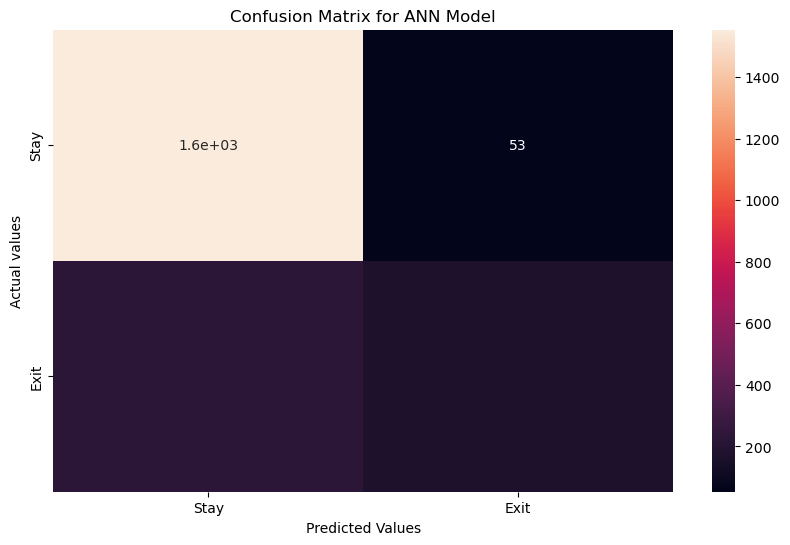

In [54]:
# Plotting confusion Matrix
plt.figure(figsize=(10,6))
sns.heatmap(conf_matrix, annot= True, xticklabels = ['Stay', 'Exit'], yticklabels =['Stay', 'Exit'])
plt.xlabel("Predicted Values")
plt.ylabel("Actual values")
plt.title("Confusion Matrix for ANN Model")
plt.show()

##### Calculate the Accuracy

In [55]:
score = accuracy_score(y_test, y_pred)
print("The Accuracy for ANN Model is: {}%" .format(score*100))

The Accuracy for ANN Model is: 85.95%
